<a href="https://colab.research.google.com/github/arlspt/Machine_Learning/blob/main/Pertemuan5_Quiz1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra

**Anggota:**
1. Lalu Immaratul Ardhi Ganeru
2. Muhammad Ariel Saputra
3. Muhammad Kemal Nugraha
4. Ratnasari

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from skimage import exposure
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=70, color=True, resize=0.4)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 7
Data dimension: (1288, 50, 37, 3)
Images flatten dimension: (1288, 5550)


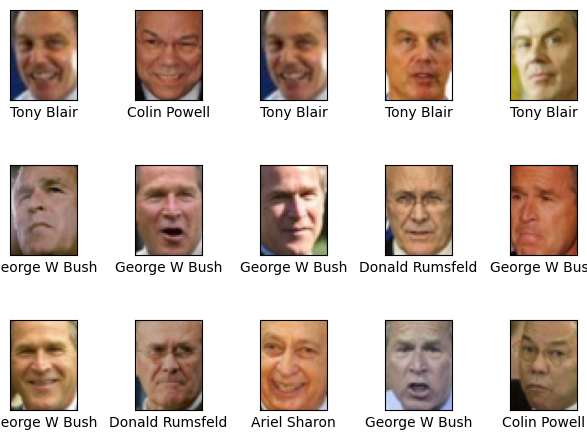

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
from operator import le
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''
x = faces.data

scaler = StandardScaler()
x = scaler.fit_transform(x)
le = LabelEncoder()
y = le.fit_transform(faces.target)
print("Shape of x (data):",x.shape)
print("Shape of y (target):",y.shape)

Shape of x (data): (1288, 5550)
Shape of y (target): (1288,)


# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''
def extract_histogram_features(images, bins, range):
    # Menyimpan histogram dari setiap sample dalam x
    hist_features = []

    for img in images:
        if len(img.shape) == 3:  # Color image
            hist_channels = []
            for channel in range(img.shape[2]):
                hist, _ = np.histogram(img[:, :, channel], bins=bins, range=range)
                hist_channels.extend(hist / np.sum(hist))
            hist_features.append(hist_channels)
        else:  # Grayscale image
            hist, _ = np.histogram(img, bins=bins, range=range)
            hist_features.append(hist / np.sum(hist))
    return np.array(hist_features)

# Ekstraksi fitur histogram dari x
x_hist = extract_histogram_features(x, bins=64, range=(-3, 3))  # Range dapat disesuaikan

print("Shape of histograms:", x_hist.shape)  # Menampilkan dimensi array
print("Sampel 5 nilai awal:")
print(x_hist[:5])
scaler = StandardScaler()
x_hist = scaler.fit_transform(x_hist)

Shape of histograms: (1288, 64)
Sampel 5 nilai awal:
[[0.         0.         0.         0.         0.         0.
  0.00018077 0.         0.00036153 0.00036153 0.00090383 0.00126537
  0.00234996 0.00234996 0.00415763 0.00506146 0.00433839 0.00614606
  0.00849602 0.00813449 0.00777296 0.01500362 0.01572668 0.01753435
  0.02331887 0.02133044 0.0258496  0.03651482 0.03470716 0.04193782
  0.04085322 0.04718004 0.04591468 0.0565799  0.0571222  0.0560376
  0.05314534 0.05567607 0.05025307 0.03976862 0.03543022 0.03705712
  0.02892263 0.02277657 0.01482285 0.01500362 0.01229212 0.01066522
  0.00976139 0.00596529 0.00560376 0.00397686 0.00307303 0.00198843
  0.00126537 0.0010846  0.00126537 0.00090383 0.00036153 0.00018077
  0.00018077 0.00036153 0.0005423  0.00018077]
 [0.00126422 0.00144483 0.00270905 0.00361206 0.00397327 0.00505689
  0.00523749 0.00830775 0.00704353 0.00866895 0.00884956 0.01210042
  0.01246162 0.01715731 0.01914394 0.0169767  0.02040816 0.02149178
  0.02961893 0.02672928 0

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''
# Membuat data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(x_hist, y, test_size=0.2, random_state=42)

# Membuat objek model
model = SVC(kernel='rbf',gamma='auto', random_state=42, C=1)

# Melakukan fitting model
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', random_state=42)

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

y_test_pred = model.predict(X_test)
# Menghitung akurasi
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test: {acc_test}')

# Menghitung classification report
print(classification_report(y_test, y_test_pred, labels=np.unique(y_test_pred), target_names=faces.target_names))

Accuracy on test: 0.4496124031007752
                   precision    recall  f1-score   support

     Ariel Sharon       0.31      0.09      0.13        47
     Colin Powell       0.46      0.94      0.62       119
  Donald Rumsfeld       0.00      0.00      0.00        27

        micro avg       0.45      0.60      0.51       193
        macro avg       0.26      0.34      0.25       193
     weighted avg       0.36      0.60      0.42       193



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2642: UserWarning: labels size, 3, does not match size of target_names, 7
  warnings.warn(


# Menggunakan fitur ekstraksi PCA (Principal Component Analysis) dan model dasar Random Forest

In [ ]:
n_components = 0.95  # Misalnya kita ingin mereduksi menjadi 150 dimensi

# Menggunakan PCA untuk ekstraksi fitur
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(faces.data)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Menghitung akurasi
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test: {acc_test}')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", confusion_mat)

Accuracy on test: 0.4496124031007752
Confusion Matrix:
 [[  0   0   0  11   0   0   0]
 [  0  20   0  27   0   0   0]
 [  0   0   2  20   0   0   0]
 [  0   0   0 119   0   0   0]
 [  0   0   0  15   4   0   0]
 [  0   1   0  12   0   0   0]
 [  0   1   0  24   0   0   2]]
